In [1]:
import pandas as pd
df=pd.read_csv('../DATA/BA_reviews.csv',index_col=0)

In [2]:
df.head(20)


,Text Review,Type of Traveler,Aircraft,Seat Type,Seat Comfort Rating,Cabin Staff Service Rating,Food Beverages Rating,Inflight Entertainment Rating,Ground Service Rating,Value for Money Rating,Recommended,Sentiment
0,Really terrible user experience. British Air...,Solo Leisure,0,Economy Class,0,0,0,0,1,3,no,Negative
1,Very impressed with BA. Check in online was a...,Couple Leisure,0,Economy Class,4,5,5,5,4,4,yes,Positive
2,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",Family Leisure,A380 / Boeing 777-200ER,Business Class,2,5,4,4,5,2,no,Negative
3,I flew from Malaga via LHR to Boston on the ...,Couple Leisure,0,Economy Class,2,2,1,2,1,2,no,Negative
4,Milan to Miami return via London. Worst busi...,Couple Leisure,A380,Business Class,1,2,3,2,2,1,no,Negative
5,BA created a new low-cost subsidiary in BA E...,Couple Leisure,A320,Economy Class,2,1,1,0,3,1,no,Negative
6,I flew with British Airways from Heathrow t...,Solo Leisure,0,Economy Class,3,3,0,0,1,1,no,Negative
7,Manchester to Copenhagen via London on 30th ...,Solo Leisure,A319 / A320,Economy Class,3,3,2,0,4,4,yes,Negative
8,I have never seen such disrespect to a custo...,Solo Leisure,0,Economy Class,1,1,0,0,1,1,no,Negative
9,Paid for a 14 hour long flight ticket which ...,Business,A380,Economy Class,3,3,3,1,1,1,no,Negative


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


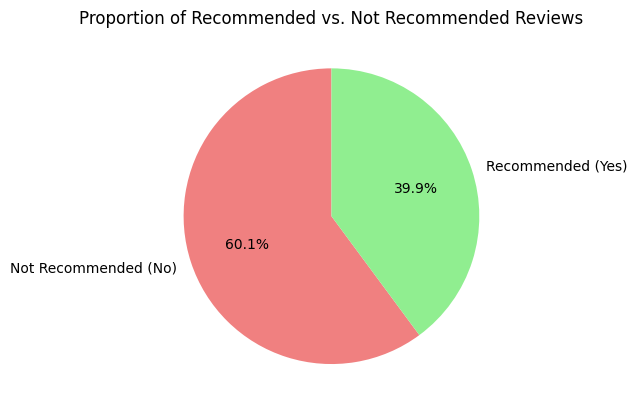

In [4]:
import matplotlib.pyplot as plt


labels = ['Recommended (Yes)', 'Not Recommended (No)']
sizes = df['Recommended'].value_counts()


if 'no' in sizes.index and 'yes' in sizes.index:
    labels = ['Not Recommended (No)', 'Recommended (Yes)']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Recommended vs. Not Recommended Reviews')
plt.savefig('../Visualization/recommendation_pie_chart.jpg', bbox_inches='tight', dpi=720)
plt.show()


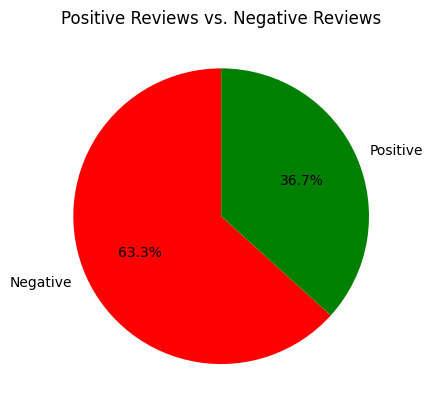

In [5]:
import matplotlib.pyplot as plt

sentiment_labels = ["Positive", "Negative"]
sizes = df['Sentiment'].value_counts()


if 'Negative' in sizes.index and 'Positive' in sizes.index:
    sentiment_labels = ['Negative', 'Positive']

plt.pie(sizes, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Positive Reviews vs. Negative Reviews')
plt.savefig('../Visualization/positive_vs_negative_pie_chart.jpg', bbox_inches='tight', dpi=720)
plt.show()


In [6]:
print( df['Seat Type'].value_counts())
print('-------------------------------------------------')
print( df['Recommended'].value_counts())

Seat Type
Economy Class      1942
Business Class     1221
Premium Economy     363
First Class         212
0                     2
Name: count, dtype: int64
-------------------------------------------------
Recommended
no     2249
yes    1491
Name: count, dtype: int64


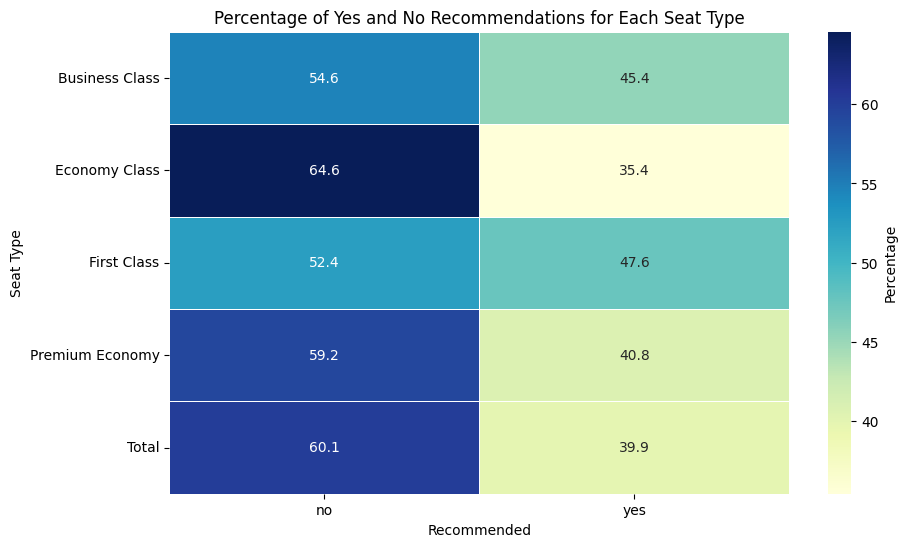

In [7]:
import seaborn as sns
df = df[df['Seat Type'] != '0']
contingency_table = pd.crosstab(df['Seat Type'], df['Recommended'], margins=True, margins_name='Total')

# Calculating the percentage of 'Yes' and 'No' for each seat type in the df
contingency_table_percentage = contingency_table.div(contingency_table['Total'], axis=0) * 100

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_percentage[['no', 'yes']], annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5, cbar_kws={'label': 'Percentage'})
plt.title('Percentage of Yes and No Recommendations for Each Seat Type')
plt.xlabel('Recommended')
plt.ylabel('Seat Type')
plt.savefig('../Visualization/seattype_VS_recommendation.jpg',bbox_inches='tight',dpi=720)
plt.show()

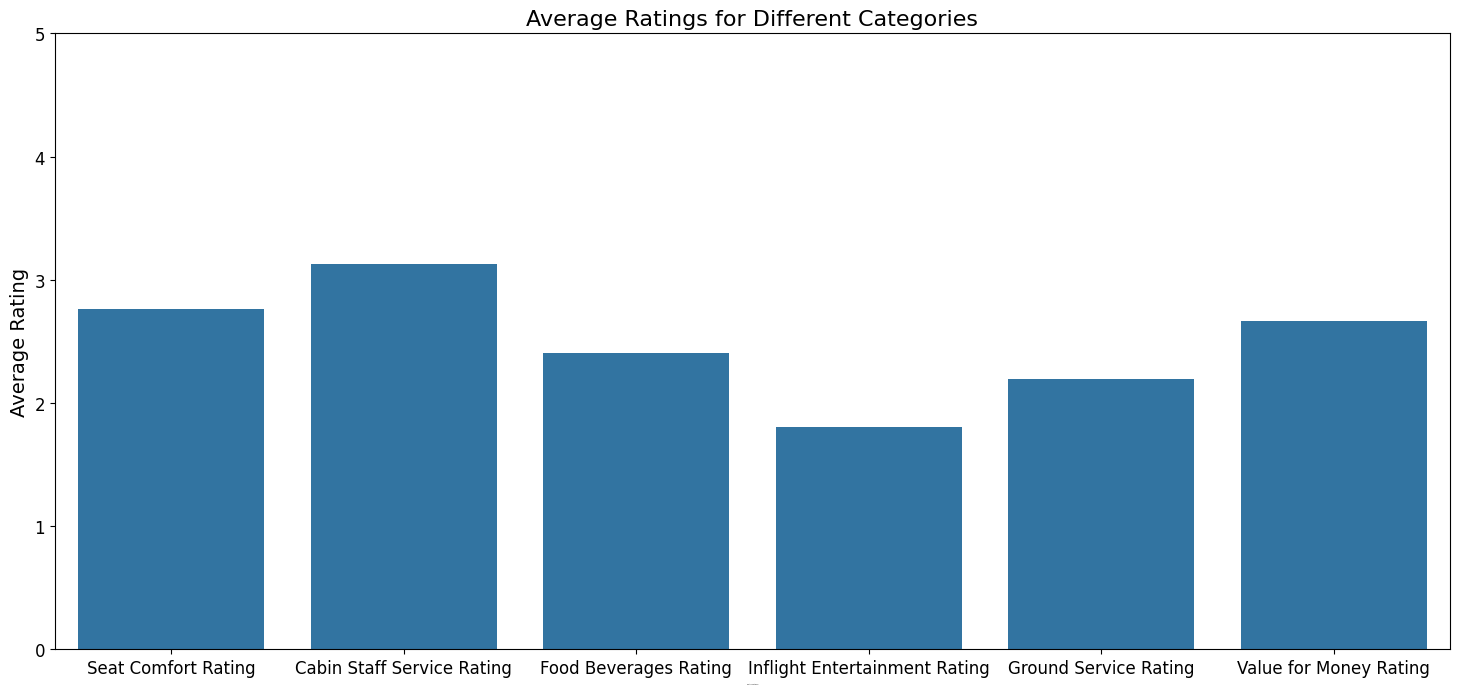

In [8]:

average_ratings = df[['Seat Comfort Rating', 'Cabin Staff Service Rating', 'Food Beverages Rating',
                      'Inflight Entertainment Rating', 'Ground Service Rating', 'Value for Money Rating']].mean()


plt.figure(figsize=(18, 8))
sns.barplot(x=average_ratings.index, y=average_ratings.values) 
plt.title('Average Ratings for Different Categories', fontsize=16)
plt.ylim(0, 5)  
plt.ylabel('Average Rating', fontsize=14)
plt.xlabel('Rating Category', fontsize=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../Visualization/MeanRating.jpg', bbox_inches='tight', dpi=720)
plt.show()


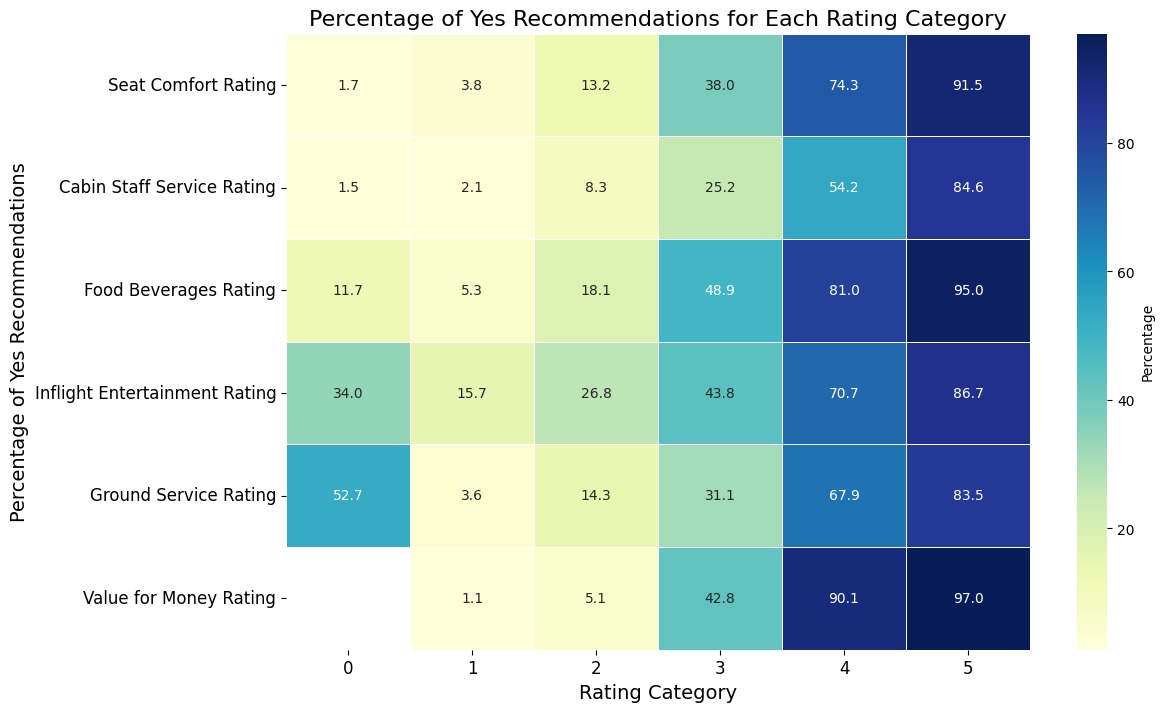

In [9]:
rating_columns = ['Seat Comfort Rating', 'Cabin Staff Service Rating', 'Food Beverages Rating',
                   'Inflight Entertainment Rating', 'Ground Service Rating', 'Value for Money Rating']
percentage_df = pd.DataFrame()

for col in rating_columns:
    rating_counts = df.groupby(col)['Recommended'].value_counts(normalize=True).unstack()
    percentage_df[col] = rating_counts['yes'] * 100

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_df.T, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5, cbar_kws={'label': 'Percentage'})
plt.title('Percentage of Yes Recommendations for Each Rating Category', fontsize=16)
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Percentage of Yes Recommendations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../Visualization/Rating_Vs_Yes-recommendations.jpg', bbox_inches='tight', dpi=720)
plt.show()